# **Assignment 4(PART - A)**

---



Dimensions of the dataset:
 (70, 50)

Column names in the dataset:
 Index(['City', 'Sex', 'Age', 'Occupation', 'Monthly Household Income',
       'Income', 'Planning to Buy a new house', 'Time Frame',
       'Reasons for buying a house', 'what type of House', 'Number of rooms',
       'Size of House', 'Budget', 'Finished/Semi Finished',
       'Influence Decision', 'Maintainance', 'EMI', '1.Proximity to city',
       '2.Proximity to schools', '3. Proximity to transport',
       '4. Proximity to work place', '5. Proximity to shopping',
       '1. Gym/Pool/Sports facility', '2. Parking space', '3.Power back-up',
       '4.Water supply', '5.Security', '1. Exterior look ', '2. Unit size',
       '3. Interior design and branded components',
       '4. Layout plan (Integrated etc.)', '5. View from apartment',
       '1. Price', '2. Booking amount', '3. Equated Monthly Instalment (EMI)',
       '4. Maintenance charges', '5. Availability of loan',
       '1. Builder reputation', '2. Appreciati

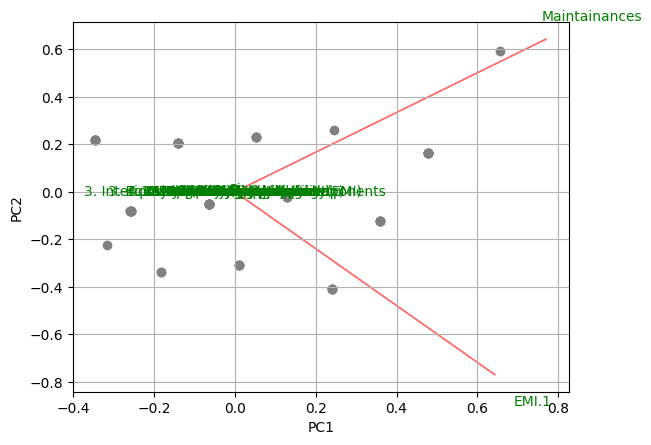


Final structure of the selected data subset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   3. Proximity to transport                  70 non-null     int64  
 1   4. Proximity to work place                 70 non-null     int64  
 2   5. Proximity to shopping                   70 non-null     int64  
 3   1. Gym/Pool/Sports facility                70 non-null     int64  
 4   2. Parking space                           70 non-null     int64  
 5   3.Power back-up                            70 non-null     int64  
 6   4.Water supply                             70 non-null     int64  
 7   5.Security                                 70 non-null     int64  
 8   1. Exterior look                           70 non-null     int64  
 9   2. Unit size                               70 non-nul

In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the survey data
survey_df = pd.read_csv('Survey.csv')

# Display dimensions, column names, and structure of the dataset
print("Dimensions of the dataset:\n", survey_df.shape)

print("\nColumn names in the dataset:\n", survey_df.columns)

print("\nFirst few rows of the dataset:\n", survey_df.head())

print("\nStructure of the dataset:\n")
print(survey_df.info())

# Check for missing values
print("\nChecking for missing values:\n", survey_df.isnull().sum().sum())

# Select the relevant columns for PCA and Factor Analysis
sur_int = survey_df.iloc[:, 19:46]

print("\nStructure of the selected data subset:\n")
print(sur_int.info())

print("\nDimensions of the selected data subset:\n", sur_int.shape)

# Perform Principal Component Analysis (PCA)
print("\nPerforming Principal Component Analysis (PCA):\n")
pca = PCA(n_components=5)
pca_result = pca.fit_transform(sur_int.fillna(0))  # Fill NA values with 0 for PCA
print("Explained variance by component:\n", pca.explained_variance_ratio_)
print("PCA components:\n", pca.components_)

# PCA Visualization
def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c='gray')
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var" + str(i + 1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

# Biplot using PCA result
biplot(pca_result, np.transpose(pca.components_), labels=sur_int.columns)
plt.show()

# Show final structure and dimensions of the selected data subset
print("\nFinal structure of the selected data subset:\n")
print(sur_int.info())

print("\nFinal dimensions of the selected data subset:\n", sur_int.shape)

print("\nShowing the selected data subset:\n")
print(sur_int.head())
